<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/DR-mostafa/blob/main/traditional%20autoencoder/traditional_ae_colab_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# related to kaggle 

In [ ]:
!conda install -y gdown

In [ ]:
#downloading first part of ECG
!gdown https://drive.google.com/uc?id=1jt__DwKtdHOQypNVBjnp9SeaqGwoRazG

In [ ]:
#downloading first part of PPG  beats data
!gdown https://drive.google.com/uc?id=1u-QWYMJ3h7bd2fWy5UmUgQtCtvmWge-K

In [ ]:
#downloading second part of ecg  beats data
!gdown https://drive.google.com/uc?id=1K1-xeL4RKmURSsppi0X7s7U4TQVOy7eF   

In [ ]:
#downloading third part of ecg  beats data
!gdown https://drive.google.com/uc?id=1w-2QFZ5CnchAm0JkwfQ-lLBTwLYO4Hc0   

In [ ]:
#downloading fourth part of ecg  beats data
!gdown https://drive.google.com/uc?id=13Y7gLQb3FNWsRlQ8DUp5JP9UUttjytQm

In [ ]:
#downloading second part of PPG peak to peak beats data
!gdown https://drive.google.com/uc?id=1F086tcERdEOcsbvqRmhN6PGX6NVZqX3P

In [ ]:
#downloading third part of PPG peak to peak beats data
!gdown https://drive.google.com/uc?id=1LWxX-F5z177l6OEUS4V7nJxbJnpK4A5G

In [ ]:
#downloading fourth part of PPG peak to peak beats data
!gdown https://drive.google.com/uc?id=1faRVH5KPR-q4gxhS86DFfkStCxYo5tHd

# Downloading model from gdrive

In [ ]:
!gdown https://drive.google.com/uc?id=1MFNll8OlSnXVVoJsiACEgsTjvdaRBRPU


In [ ]:
import os

# folder path
dir_path = r'./'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
print(res)

In [ ]:
"PPG" in 'Part_4_PPG_beats_P2P_Aug_2022.csv'

In [ ]:
res_ecg = []
res_ppg = []
for i in res:
    if ("PPG".lower() in i.lower()):
        res_ppg.append("./"+i)
    elif ("ECG".lower() in i.lower()):
        res_ecg.append("./"+i)
print("ECGs are ",res_ecg)
print("*=+"*30)
print("PPGs are ",res_ppg)

In [ ]:
ECG1 = pd.read_csv(res_ecg[0],names = np.arange(120))
ECG2 = pd.read_csv(res_ecg[1],names = np.arange(120))
ECG3 = pd.read_csv(res_ecg[2],names = np.arange(120))
ECG4 = pd.read_csv(res_ecg[3],names = np.arange(120))

PPG1 = pd.read_csv(res_ppg[0],names = np.arange(120))
PPG2 = pd.read_csv(res_ppg[1],names = np.arange(120))
PPG3 = pd.read_csv(res_ppg[2],names = np.arange(120))
PPG4 = pd.read_csv(res_ppg[3],names = np.arange(120))

#Colab part

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from keras.layers import *
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.models import Model
from  IPython.display import clear_output
import seaborn as sns
#for Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
ECG1 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_1/p2p_beats/part_1_ECG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))
PPG1 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_1/p2p_beats/part_1_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))


PPG2 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_2/p2p_beats/Part_2_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))

ECG2= pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_2/p2p_beats/Part_2_ECG_beats_P2P_Aug_2022.csv",
                  names = np.arange(120))


PPG3 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_3/p2p_beats/Part_3_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))
ECG3= pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_3/p2p_beats/Part_3_ECG_beats_P2P_Aug_2022.csv",
                  names = np.arange(120))


PPG4 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_4/p2p_beats/Part_4_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))
ECG4= pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_4/p2p_beats/Part_4_ECG_beats_P2P_Aug_2022.csv",
                  names = np.arange(120))

In [4]:
PPG2.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.0000,0.99936,0.99342,0.98038,0.96353,0.94247,0.91710,0.88756,0.85714,0.82409,...,0.52681,0.60618,0.67979,0.74262,0.79751,0.84176,0.87296,0.89271,0.90317,0.90681
1,1.0000,0.99379,0.98255,0.96696,0.94685,0.92224,0.89306,0.85940,0.82271,0.78420,...,0.52567,0.60321,0.67661,0.74411,0.80116,0.84753,0.88339,0.90873,0.92312,0.92853
2,0.6994,0.69738,0.69147,0.68079,0.66662,0.65012,0.63086,0.60789,0.58268,0.55507,...,0.59157,0.66460,0.73871,0.80598,0.86372,0.91217,0.95106,0.97777,0.99347,1.00000
3,0.9778,0.97774,0.97085,0.95468,0.93467,0.90811,0.87914,0.85212,0.82253,0.78959,...,0.67356,0.74047,0.79952,0.85645,0.90575,0.94486,0.97208,0.99032,0.99862,1.00000
4,0.9368,0.93153,0.92007,0.90214,0.87864,0.85156,0.82178,0.79004,0.75420,0.71873,...,0.65946,0.73651,0.80629,0.86763,0.91272,0.94569,0.96969,0.98626,0.99596,1.00000


In [5]:
PPG = pd.concat([PPG1 , PPG2,PPG3,PPG4],keys = list(map(str,list(range(0,120)))) , ignore_index = True)


In [6]:
ECG = pd.concat([ECG1 , ECG2,ECG3,ECG4],keys = list(map(str,list(range(0,120)))), ignore_index = True )

In [7]:
PPG.shape,PPG1.shape,PPG2.shape

((691570, 120), (154540, 120), (205320, 120))

In [8]:
PPG.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.00000,0.99971,0.99898,0.99602,0.99104,0.98427,0.97570,0.96534,0.95313,0.93891,...,0.86711,0.89480,0.91637,0.93424,0.95006,0.96290,0.97265,0.97946,0.98329,0.98515
1,1.00000,0.99986,0.99938,0.99671,0.99211,0.98582,0.97781,0.96817,0.95657,0.94259,...,0.87321,0.89588,0.91331,0.92665,0.93742,0.94541,0.95071,0.95352,0.95363,0.95355
2,1.00000,0.99805,0.99416,0.98829,0.98048,0.97107,0.96004,0.94735,0.93303,0.91708,...,0.83197,0.86486,0.89022,0.91013,0.92479,0.93626,0.94502,0.95083,0.95364,0.95499
3,0.91394,0.91331,0.91198,0.90826,0.90231,0.89456,0.88500,0.87378,0.86088,0.84626,...,0.86086,0.89582,0.92488,0.94820,0.96554,0.97851,0.98723,0.99360,0.99787,1.00000
4,0.91259,0.91280,0.91298,0.91087,0.90681,0.90120,0.89398,0.88514,0.87469,0.86219,...,0.91012,0.93643,0.95764,0.97392,0.98525,0.99285,0.99716,0.99942,0.99987,1.00000


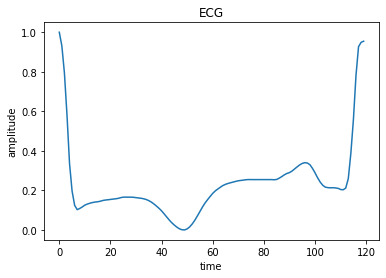

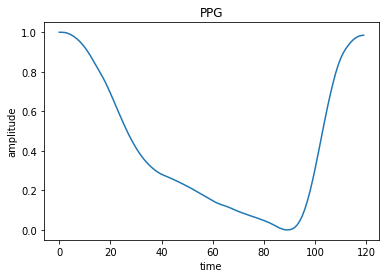

In [9]:
plt.plot(ECG.iloc[0,:].values);
plt.xlabel('time');
plt.ylabel('amplitude');
plt.title("ECG");

plt.figure();
plt.plot(PPG.iloc[0,:].values);
plt.xlabel('time');
plt.ylabel('amplitude');
plt.title("PPG");

In [10]:
X = PPG.values
input_shape = (X.shape[0],120,1)
X = np.reshape(X,input_shape)
print("input shape is ",X.shape)
y= ECG.values
input_shape = (y.shape[0],120,1)
y = np.reshape(y,input_shape)
print("output shape is ",y.shape)

input shape is  (691570, 120, 1)
output shape is  (691570, 120, 1)


In [11]:
X_train,X_test , y_train  , y_test = train_test_split(X , y , test_size = 0.11,shuffle=True)
print("train shape is ",X_train.shape)
print("test shape is ",X_test.shape)

train shape is  (615497, 120, 1)
test shape is  (76073, 120, 1)


In [12]:
model = Sequential()

model.add(Conv1D(512, 5, padding='same', input_shape=input_shape[1:]))
model.add(MaxPooling1D(2, padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(256, 5, padding='same'))
model.add(MaxPooling1D(2, padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(128, 3, padding='same'))
model.add(MaxPooling1D(2, padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(64, 3, padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
#model.add(MaxPooling1D(2, padding='same'))
model.add(BatchNormalization())

model.add(Conv1D(64,3, padding='same')) 
model.add(BatchNormalization())
model.add(LeakyReLU())

#model.add(MaxPooling1D(2, padding='same'))

model.add(Conv1D(64, 3, padding='same'))
model.add(UpSampling1D(2)) 
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(64, 3, padding='same'))
model.add(UpSampling1D(2))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(128, 3, padding='same'))
#model.add(UpSampling1D(2))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(256, 5, padding='same'))
model.add(UpSampling1D(2))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(512, 5, padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())

#model.add(UpSampling1D( 2))
model.add(Conv1D(1, 5, activation='relu', padding='same'))




In [13]:
callbacks = [
            keras.callbacks.TensorBoard(
            log_dir='my_log_dir',
            histogram_freq=1,
            embeddings_freq=1,
            ),
             ModelCheckpoint('/content/gdrive/MyDrive/most cleaned version beats/traditional ae to retrain/model',
                             save_best_only=True),
             keras.callbacks.EarlyStopping(
                                      monitor="val_loss",
                                      min_delta= 0,
                                      patience= 5,
                                      verbose= 0,
                                      mode="auto",
                                      baseline=None,
                                      restore_best_weights=True,
)
]

In [14]:
model = keras.models.load_model('/content/gdrive/MyDrive/most cleaned version beats/traditional ae to retrain/model')

In [17]:
#model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_80 (Conv1D)          (None, 120, 512)          3072      
                                                                 
 max_pooling1d_25 (MaxPoolin  (None, 60, 512)          0         
 g1D)                                                            
                                                                 
 batch_normalization_65 (Bat  (None, 60, 512)          2048      
 chNormalization)                                                
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 60, 512)           0         
                                                                 
 conv1d_81 (Conv1D)          (None, 60, 256)           655616    
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 30, 256)         

In [ ]:
model.fit( X_train , y_train , epochs=20 , batch_size = 32 ,validation_split = 0.2,callbacks = callbacks)           

Epoch 1/20
 1112/15388 [=>............................] - ETA: 3:06:07 - loss: 0.0175 - mse: 0.0175

In [15]:
model.evaluate(X_test , y_test)

2378/2378 [==============================] - 416s 175ms/step - loss: 0.0179 - mse: 0.0179


[0.017862806096673012, 0.017862822860479355]

In [16]:
print("Output")
pred = model.predict(X_test)   #Predict model on the same input array.

Output
2378/2378 [==============================] - 414s 174ms/step


In [76]:
X_test.shape,pred.shape

((76073, 120, 1), (76073, 120, 1))

58133
54944
2580
23682
65544
42846
4763
36622
40543
60056


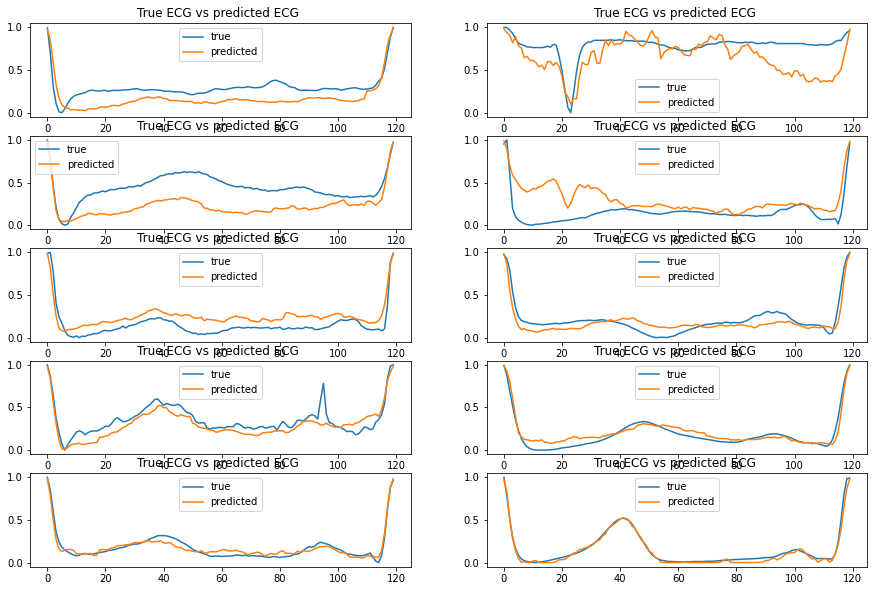

In [23]:
i = np.random.randint(0,76073,10)
plt.figure(figsize=(15,10))

for j in range(10) :
  print(i[j])
  plt.subplot(5,2,j+1)
  plt.plot(y_test[i[j],:,0],label = 'true')
  plt.plot(pred[i[j],:,0],label = 'predicted')
  plt.title("True ECG vs predicted ECG ")
  plt.legend()




In [24]:
model.save('/content/gdrive/MyDrive/most cleaned version beats/traditional ae to retrain/model/PPG_ECG_autoencoder_beats_part1_part2')

In [ ]:
import shutil
shutil.make_archive('./PPG_ECG_autoencoder_beats_part1_part2', 'zip', './')